# Image and language processing - Homework 1
## Sander Tars

In [132]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from time import time

# 1. Load an image into the workspace of the software.
img = cv2.imread('forest2.jpeg')

In [133]:
# 2. Convert the image to grayscale.
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [134]:
# 3. Resize the grayscale image by a factor of 0.5 on both of the dimensions.
small_gray_img = cv2.resize(gray_img, (0,0), fx=0.5, fy=0.5)

In [135]:
# 4. Resize the image that you obtained in step 3 to the original resolution, i.e. by a factor of 2, by
# using nearest-neighbor, linear and bicubic interpolation techniques, separately.
a = time()
nn_gray_img = cv2.resize(small_gray_img, (0,0), fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
b = time()
nn = b - a

a = time()
ln_gray_img = cv2.resize(small_gray_img, (0,0), fx=2, fy=2, interpolation = cv2.INTER_LINEAR)
b = time()
ln = b - a

a = time()
cu_gray_img = cv2.resize(small_gray_img, (0,0), fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
b = time()
cu = b - a

In [136]:
# 5. Compare the computation times of the above interpolation methods.
print("NN interpoletion time:", nn)
print("Linear interpolation time:", ln)
print("Cubic interpolation time:", cu)

print("The speeds vary depending on image, however, they all work fast in case of one image.")

NN interpoletion time: 0.001056671142578125
Linear interpolation time: 0.0005350112915039062
Cubic interpolation time: 0.0008440017700195312
Fastest is NN, followed by linear, followed by cubic.


In [137]:
# 6. Save the images to files.
cv2.imwrite("nn_gray_polated.jpeg", nn_gray_img)
cv2.imwrite("linear_gray_polated.jpeg", ln_gray_img)
cv2.imwrite("cubic_gray_polated.jpeg", cu_gray_img)

True

In [138]:
# 7. Find the pixel-wise difference between the image you obtained in step 2 and each of the images
# you created in step 4.

sb_nn = cv2.subtract(gray_img, nn_gray_img)
sb_ln = cv2.subtract(gray_img, ln_gray_img)
sb_cu = cv2.subtract(gray_img, cu_gray_img)

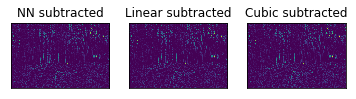

In [139]:
# 8. Compare the three different images you obtained in step 7.

plt.subplot(131), plt.imshow(sb_nn), plt.title('NN subtracted')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(sb_ln), plt.title('Linear subtracted')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(sb_cu), plt.title('Cubic subtracted')
plt.xticks([]), plt.yticks([])
plt.show()

#Some minuscule differences are seen (or maybe I imagined them), but no big differences.

NN interpoletion time: 0.004705905914306641
Linear interpolation time: 0.0008349418640136719
Cubic interpolation time: 0.00095367431640625
Fastest is NN, followed by linear, followed by cubic.


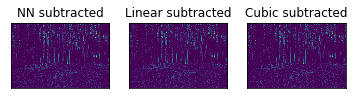

In [140]:
# 9. Repeat steps 4 to 8, but this time use a low-pass filter for antialiasing while resizing the image in
# step 4.
a = time()
nn_gray_img = cv2.resize(cv2.blur(small_gray_img,(5,5)), (0,0), fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
b = time()
nn = b - a

a = time()
ln_gray_img = cv2.resize(cv2.blur(small_gray_img,(5,5)), (0,0), fx=2, fy=2, interpolation = cv2.INTER_LINEAR)
b = time()
ln = b - a

a = time()
cu_gray_img = cv2.resize(cv2.blur(small_gray_img,(5,5)), (0,0), fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
b = time()
cu = b - a

print("NN interpoletion time:", nn)
print("Linear interpolation time:", ln)
print("Cubic interpolation time:", cu)

print("Fastest is NN, followed by linear, followed by cubic.")

cv2.imwrite("nn_gray_polated_anti.jpeg", nn_gray_img)
cv2.imwrite("linear_gray_polated_anti.jpeg", ln_gray_img)
cv2.imwrite("cubic_gray_polated_anti.jpeg", cu_gray_img)

sb_nn = cv2.subtract(gray_img, nn_gray_img)
sb_ln = cv2.subtract(gray_img, ln_gray_img)
sb_cu = cv2.subtract(gray_img, cu_gray_img)

plt.subplot(131), plt.imshow(sb_nn), plt.title('NN subtracted')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(sb_ln), plt.title('Linear subtracted')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(sb_cu), plt.title('Cubic subtracted')
plt.xticks([]), plt.yticks([])
plt.show()

In [141]:
# 10. Compare the results of step 9 with each other, and with the results of step7.
# Compared to the results from step 7 the edged look more similar to the ones which I would assume
# to be counted as edges in the original image. Thus the LPF usage seems to aid the process.

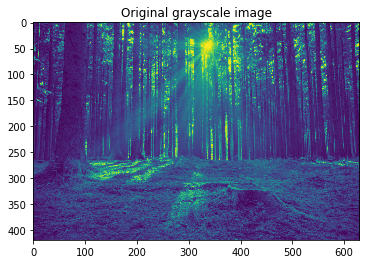

In [142]:
# Exercise 2
# In this exercise, we will learn how to perform common image enhancement and denoising techniques on
# an image. We will also learn about edge detection.
# 1. Load a grayscale image into the software’s workspace.
img = cv2.imread('forest2.jpeg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img), plt.title('Original grayscale image')
plt.show()

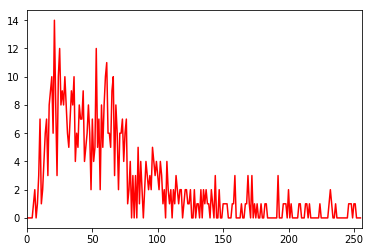

In [143]:
# 2. Draw the histogram of the image.
hist = cv2.calcHist(gray_img, [0],None,[256],[0,256])
plt.plot(hist,color = 'r')
plt.xlim([0,256])
plt.show()

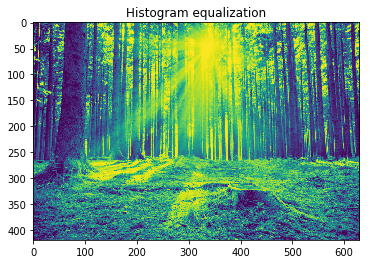

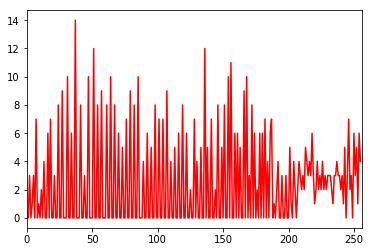

In [144]:
# 3. Apply histogram equalization to the image.

# Show the equalised image
img_eq = cv2.equalizeHist(gray_img)
plt.imshow(img_eq), plt.title('Histogram equalization')
plt.show()

# Show the histogram of histequalised image
hist = cv2.calcHist(hist_eq, [0],None,[256],[0,256])
plt.plot(hist,color = 'r')
plt.xlim([0,256])
plt.show()

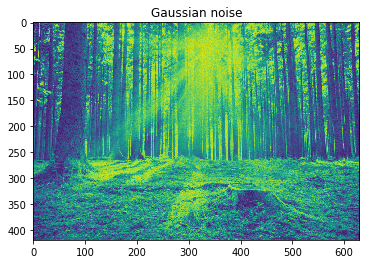

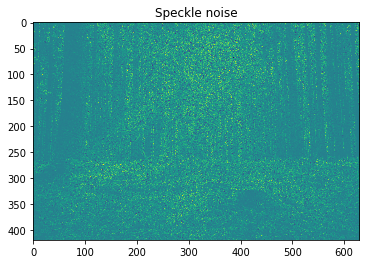

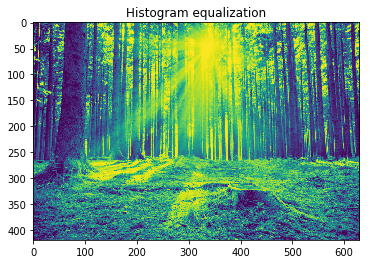

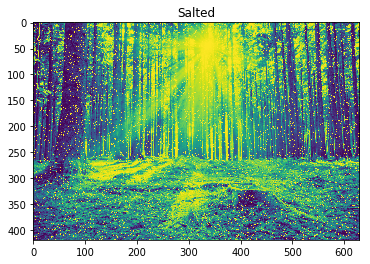

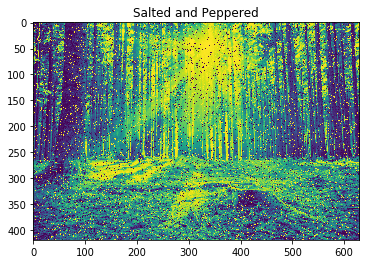

In [145]:
# 4. Introduce salt and pepper, speckle and Gaussian noises into the image, separately.
# Gaussian
noise = np.random.randn(*img_eq.shape)*10
gray_gaus = img_eq + noise
plt.imshow(gray_gaus), plt.title('Gaussian noise')
plt.show()

# S&P
# Salt - white = 255
def salt(portion, img):
    salted = img
    p = int(img.shape[0] * img.shape[1] * portion)
    for i in range(p):
        salted[np.random.choice(img.shape[0])][np.random.choice(img.shape[1])] = 255
    return img

# Pepper - black = 0
def pepper(portion, img):
    peppered = img
    p = int(img.shape[0] * img.shape[1] * portion)
    for i in range(p):
        peppered[np.random.choice(img.shape[0])][np.random.choice(img.shape[1])] = 0
    return peppered

# Speckle -- not sure at all about the implementation
def speckle(image):
    row,col = image.shape
    gauss = np.random.randn(row,col)
    gauss = gauss.reshape(row,col)        
    noisy = image + image * gauss
    return noisy

gray_spec = speckle(img_eq)
plt.imshow(gray_spec), plt.title('Speckle noise')
plt.show()

plt.imshow(img_eq), plt.title('Histogram equalization')
plt.show()

salted = salt(0.05, img_eq)

plt.imshow(salted), plt.title('Salted')
plt.show()

peppered = pepper(0.05, salted)

plt.imshow(peppered), plt.title('Salted and Peppered')
plt.show()

In [146]:
# 5. Play with the noise parameters and filter window sizes, and comment on their effects on the
# results.

# Played around. Don't know if I understood correctly what needs to be done, but obviously more noise obscures the
# image more, making it harder to analyse it.

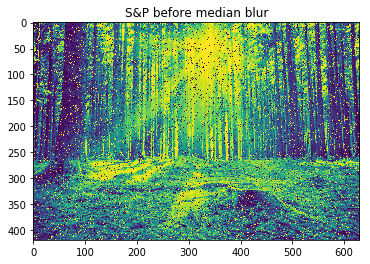

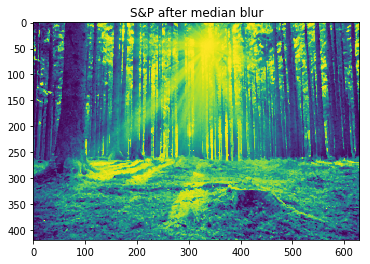

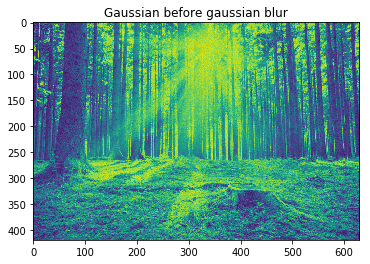

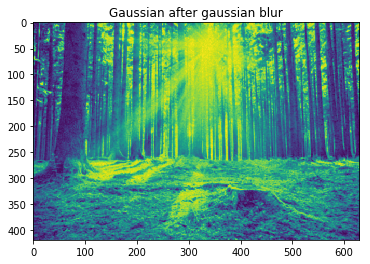

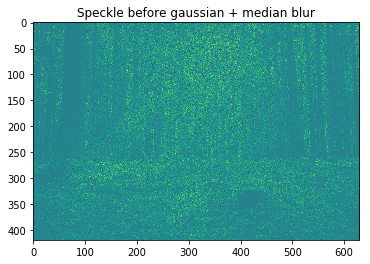

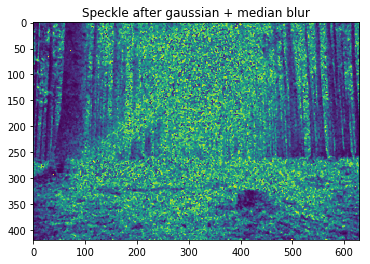

In [147]:
# 6. By using convolution, apply the appropriate filter, e.g. mean, median or adaptive, to each of the
# images you created in step 5.

# For S&P the median filter should be the best.
plt.imshow(peppered), plt.title('S&P before median blur')
plt.show()
#works already with small area in my case
median = cv2.medianBlur(peppered,3)
plt.imshow(median), plt.title('S&P after median blur')
plt.show()

# For Gaussian noise the gaussian blur should me most effective (it is meant for that after all)
plt.imshow(gray_gaus), plt.title('Gaussian before gaussian blur')
plt.show()
# lookign closely, it is visible that the noise is reduced, however the picture also blurs a bit
gaus = cv2.GaussianBlur(gray_gaus, (3,3), 0)
plt.imshow(gaus), plt.title('Gaussian after gaussian blur')
plt.show()

# For speckle noise I tried Gaussian + median, because it seemed a good idea (kind of seemed gaus + S&P)
plt.imshow(gray_spec), plt.title('Speckle before gaussian + median blur')
plt.show()
# As we can see it did not work that well
spec = cv2.GaussianBlur(gray_spec,  (3,3), 0)
spec = cv2.medianBlur(spec.astype(np.uint8),  3)
plt.imshow(spec), plt.title('Speckle after gaussian + median blur')
plt.show()

# 7. Comment on the advantages, disadvantages and applications of each of the above filters.

#Median filter is useful for "spot-noise" where surroundings are intact, this way the noisy pixels can
#be easily "repaired" using median approach. Does not work well when there is a lot of such noise.

#Gaussian filter is, as expected good at removing gaussiang noise. However the downside is that image tends
#to visibly blur more than other methods (at least when I compared them it seemed to be so).

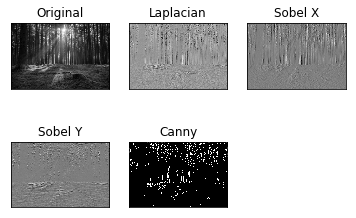

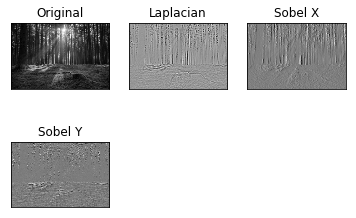

In [148]:
# 8. Perform edge detection on the original image by using different kernels.
img = cv2.imread('forest2.jpeg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray_img,(5,5),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F,ksize=5)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y
edged = cv2.Canny(img, 140, 155)

plt.subplot(2,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5),plt.imshow(edged,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

plt.show()

laplacian = cv2.Laplacian(img,cv2.CV_64F,ksize=21)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=11)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)  # y

plt.subplot(2,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()
# 9. Comment on the effect of the shape and size of the edge detection kernel on the results.

#For laplacian and Sobel (X an Y) the increase in kernel size seems to improve the results (sharpness and shape)

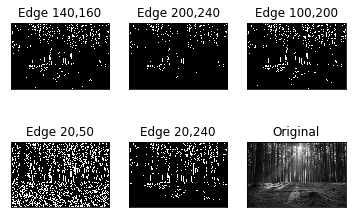

In [149]:
# 10. Play with the threshold that you consider for edge detection, and describe what you understand
# about its effect.
edge1 = cv2.Canny(img, 140, 160)
edge2 = cv2.Canny(img, 200, 240)
edge3 = cv2.Canny(img, 100, 200)
edge4 = cv2.Canny(img, 20, 50)
edge5 = cv2.Canny(img, 20, 240)

plt.subplot(2,3,1),plt.imshow(edge1,cmap = 'gray')
plt.title('Edge 140,160'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(edge2,cmap = 'gray')
plt.title('Edge 200,240'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(edge3,cmap = 'gray')
plt.title('Edge 100,200'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4),plt.imshow(edge4,cmap = 'gray')
plt.title('Edge 20,50'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5),plt.imshow(edge5,cmap = 'gray')
plt.title('Edge 20,240'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])


plt.show()

In [150]:
# The edges with intensity more than upper limit are set as definite edges 
# Those below lower limit are set as definite not-edges 
# For the ones between these two thresholds are classified based on their connectivity
# to edges above upper limit - if connected, then set as edges, if not, then discarded.
# Thus it makes sense for 20,50 to have the most edges and 200,240 the least.